In [1]:
## REQUIRED LIBRARIES
# For data wrangling 
import pandas as pd
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For data splitting and model evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# For logistic regression model
from sklearn.linear_model import LogisticRegression

# For random forest model
from sklearn.ensemble import RandomForestClassifier

# For feature scaling
from sklearn.preprocessing import StandardScaler

# For performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# For saving and loading models
import joblib

In [2]:
# Load the dataset
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
# Display data information
print(train_data.info())
print(train_data.describe())
print(train_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

In [4]:
# Handle missing values
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Cabin_ind'] = train_data['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)
train_data.drop('Cabin', axis=1, inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

In [5]:
# Convert categorical variables to numerical
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
train_data = pd.get_dummies(train_data, columns=['Embarked', 'Pclass'])

In [6]:
# Drop columns that won't be used
train_data.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [7]:
# Verify the changes
print(train_data.isnull().sum())

Survived      0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin_ind     0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Pclass_1      0
Pclass_2      0
Pclass_3      0
dtype: int64


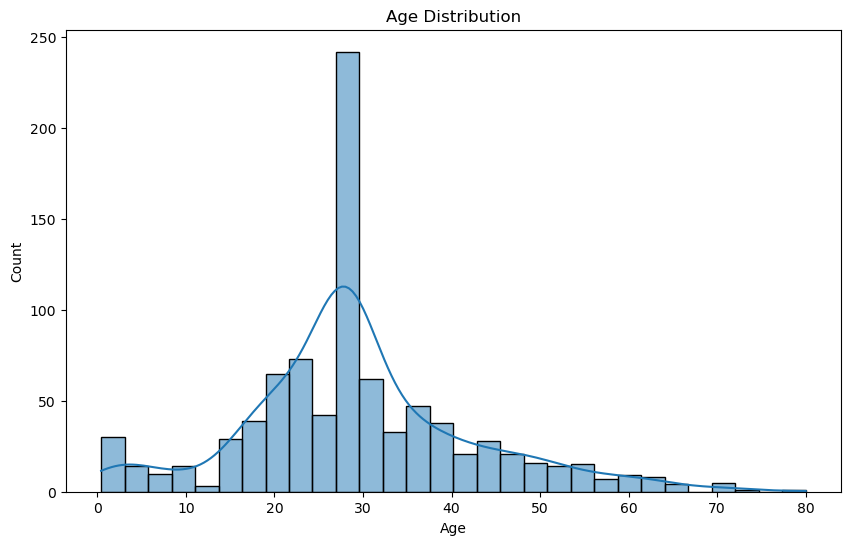

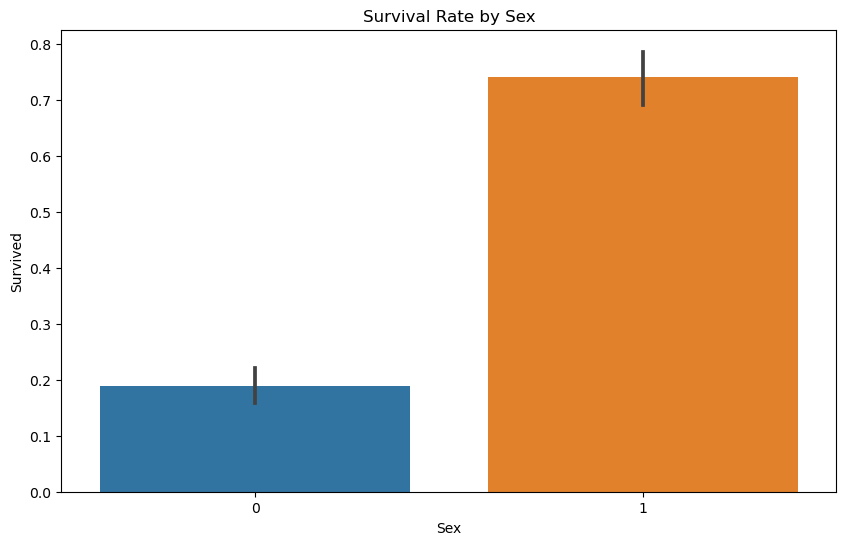

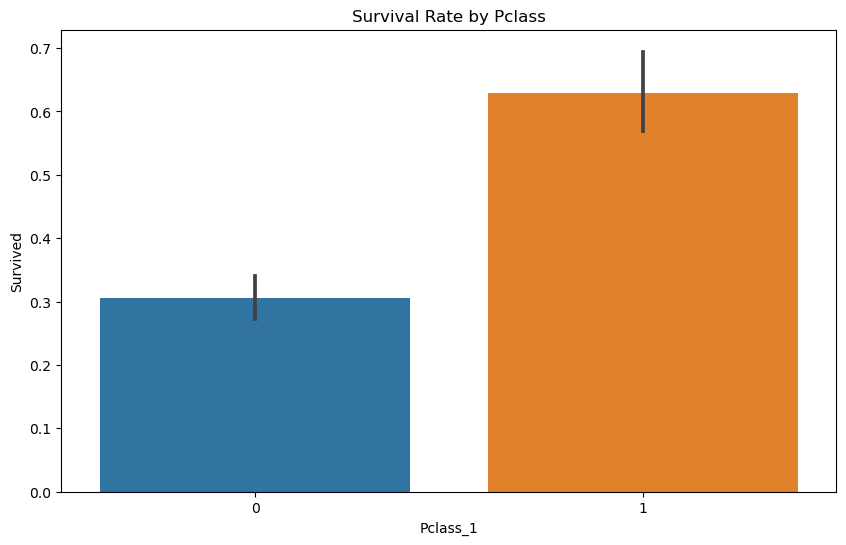

In [8]:
# Plot the distribution of the 'Age' feature
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

# Plot the survival rate by 'Sex'
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Survived', data=train_data)
plt.title('Survival Rate by Sex')
plt.show()

# Plot the survival rate by 'Pclass'
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass_1', y='Survived', data=train_data)
plt.title('Survival Rate by Pclass')
plt.show() 

In [9]:
# Define the feature set and target variable
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# Train the Logistic Regression model with scaled data
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

# Train the Random Forest model with scaled data
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

# Evaluate the models
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

# Logistic Regression evaluation
logreg_results = evaluate_model(y_test, y_pred_logreg)
print(f'Logistic Regression - Accuracy: {logreg_results[0]}, Precision: {logreg_results[1]}, Recall: {logreg_results[2]}, F1-Score: {logreg_results[3]}')

# Random Forest evaluation
rf_results = evaluate_model(y_test, y_pred_rf)
print(f'Random Forest - Accuracy: {rf_results[0]}, Precision: {rf_results[1]}, Recall: {rf_results[2]}, F1-Score: {rf_results[3]}')


Logistic Regression - Accuracy: 0.8044692737430168, Precision: 0.782608695652174, Recall: 0.7297297297297297, F1-Score: 0.7552447552447553
Random Forest - Accuracy: 0.8044692737430168, Precision: 0.782608695652174, Recall: 0.7297297297297297, F1-Score: 0.7552447552447553


In [11]:
# Hyperparameter tuning using GridSearchCV

# Logistic Regression hyperparameter tuning
logreg_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}

logreg_grid = GridSearchCV(LogisticRegression(), logreg_params, cv=5, scoring='accuracy')
logreg_grid.fit(X_train_scaled, y_train)
print(f"Best Logistic Regression Params: {logreg_grid.best_params_}")
print(f"Best Logistic Regression Score: {logreg_grid.best_score_}")

# Random Forest hyperparameter tuning
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train_scaled, y_train)
print(f"Best Random Forest Params: {rf_grid.best_params_}")
print(f"Best Random Forest Score: {rf_grid.best_score_}")


Best Logistic Regression Params: {'C': 0.01, 'max_iter': 100, 'solver': 'saga'}
Best Logistic Regression Score: 0.8075445681079485
Best Random Forest Params: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Random Forest Score: 0.8258347286516301


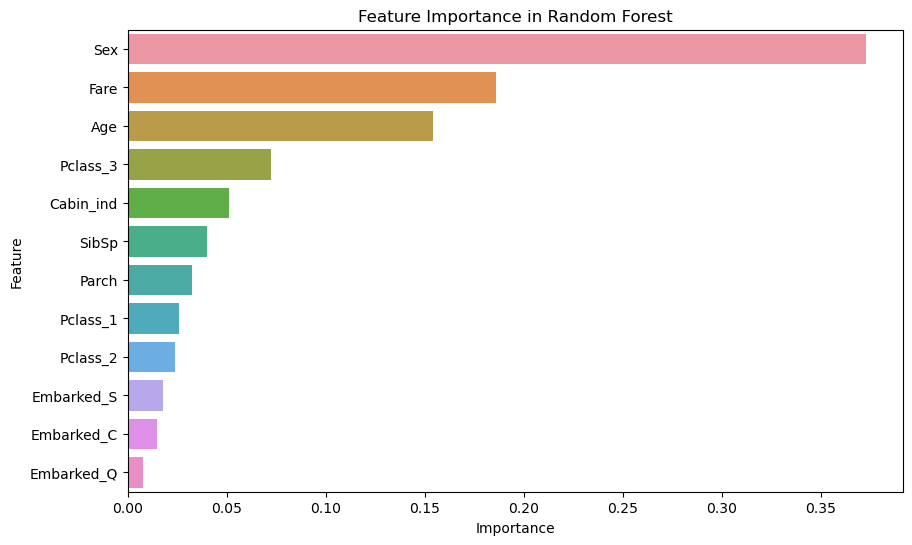

In [12]:
# Train the Random Forest model with the best parameters
best_rf = RandomForestClassifier(max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=300)
best_rf.fit(X_train_scaled, y_train)

# Obtain feature importances
importances = best_rf.feature_importances_
feature_names = X.columns

# Create a DataFrame to display feature importance
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the features by importance
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance in Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [13]:
# Make predictions on the test data
y_pred_test_rf = best_rf.predict(X_test_scaled)

# Evaluate the model on the test set
test_accuracy, test_precision, test_recall, test_f1 = evaluate_model(y_test, y_pred_test_rf)
print(f'Random Forest Test - Accuracy: {test_accuracy}, Precision: {test_precision}, Recall: {test_recall}, F1-Score: {test_f1}')

# Train final model on full training data
X_full = scaler.fit_transform(X)
y_full = y
final_rf = RandomForestClassifier(max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=300)
final_rf.fit(X_full, y_full)

Random Forest Test - Accuracy: 0.8268156424581006, Precision: 0.8524590163934426, Recall: 0.7027027027027027, F1-Score: 0.7703703703703704


RandomForestClassifier(max_depth=30, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=300)

In [14]:
# Saving the model to a file
joblib.dump(final_rf, 'final_rf_model.pkl')

['final_rf_model.pkl']